In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_orders.csv to ecommerce_orders (1).csv


In [35]:

df = pd.read_csv("ecommerce_orders.csv")
df.head()


,Order_ID,Customer_ID,Order_Date,Product_Category,Order_Amount,Quantity,Returned,City
0,O1000,C100,2023-01-01,Electronics,1200,1,False,Mumbai
1,O1001,C101,2023-01-06,Clothing,500,2,False,Delhi
2,O1002,C102,2023-01-11,Books,300,1,True,Bangalore
3,O1003,C103,2023-01-16,Home,750,3,False,Hyderabad
4,O1004,C104,2023-01-21,Clothing,450,1,False,Chennai


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          20 non-null     object
 1   Customer_ID       20 non-null     object
 2   Order_Date        20 non-null     object
 3   Product_Category  20 non-null     object
 4   Order_Amount      20 non-null     int64 
 5   Quantity          20 non-null     int64 
 6   Returned          20 non-null     bool  
 7   City              20 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 1.2+ KB


In [37]:
df.describe()

,Order_Amount,Quantity
count,20.000000,20.00000
mean,723.500000,1.65000
std,370.252759,0.74516
min,300.000000,1.00000
25%,422.500000,1.00000
50%,650.000000,1.50000
75%,950.000000,2.00000
max,1400.000000,3.00000


In [38]:

# Total Revenue
total_revenue = df['Order_Amount'].sum()

# Total Quantity Sold
total_quantity = df['Quantity'].sum()

# Total Unique Orders
total_orders = df['Order_ID'].nunique()

# Average Order Value
average_order_value = total_revenue / total_orders

print("Total Revenue:", total_revenue)
print("Total Quantity Sold:", total_quantity)
print("Total Unique Orders:", total_orders)
print("Average Order Value:", average_order_value)



Total Revenue: 14470
Total Quantity Sold: 33
Total Unique Orders: 20
Average Order Value: 723.5


In [39]:
# Revenue by Product Category
category_revenue = df.groupby('Product_Category')['Order_Amount'].sum().sort_values(ascending=False)

# Quantity Sold by Product Category
category_quantity = df.groupby('Product_Category')['Quantity'].sum().sort_values(ascending=False)

# Output results
print("🔹 Revenue by Category:")
print(category_revenue)

print("\n🔹 Quantity Sold by Category:")
print(category_quantity)


🔹 Revenue by Category:
Product_Category
Electronics    6250
Home           4170
Clothing       2450
Books          1600
Name: Order_Amount, dtype: int64

🔹 Quantity Sold by Category:
Product_Category
Home           12
Books           8
Clothing        8
Electronics     5
Name: Quantity, dtype: int64


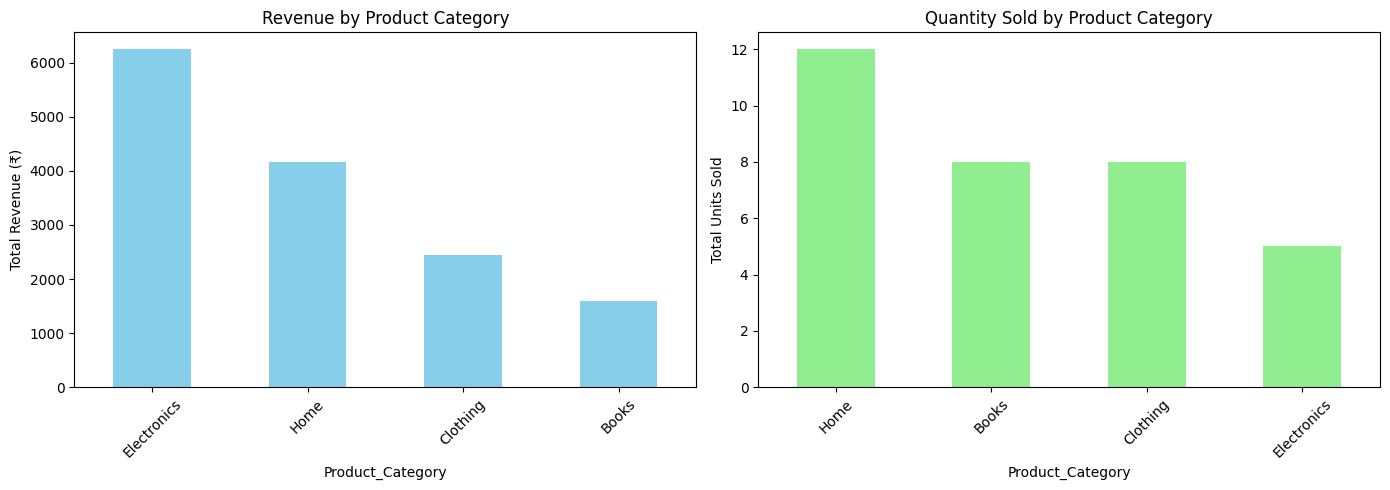

In [40]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 5))

# Revenue by Category
plt.subplot(1, 2, 1)
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)

# Quantity Sold by Category
plt.subplot(1, 2, 2)
category_quantity.plot(kind='bar', color='lightgreen')
plt.title('Quantity Sold by Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [41]:
# Revenue by City
city_revenue = df.groupby('City')['Order_Amount'].sum().sort_values(ascending=False)

# Orders by City
city_orders = df['City'].value_counts()

# Output
print(" Revenue by City:")
print(city_revenue)

print("\n Orders by City:")
print(city_orders)


 Revenue by City:
City
Mumbai       3660
Hyderabad    3590
Bangalore    2820
Delhi        2200
Chennai      2200
Name: Order_Amount, dtype: int64

 Orders by City:
City
Mumbai       4
Delhi        4
Bangalore    4
Hyderabad    4
Chennai      4
Name: count, dtype: int64


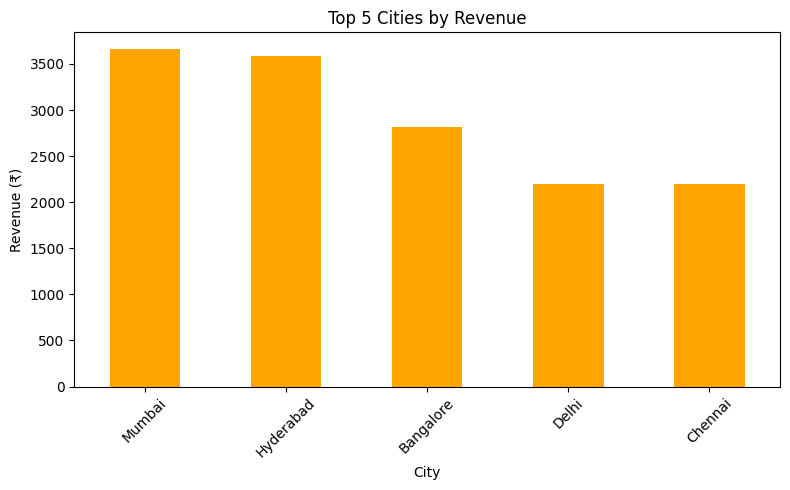

In [42]:
import matplotlib.pyplot as plt

# Top 5 cities by revenue
top5_city_revenue = city_revenue.head(5)

plt.figure(figsize=(8, 5))
top5_city_revenue.plot(kind='bar', color='orange')
plt.title('Top 5 Cities by Revenue')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
# Total orders
total_orders = df['Order_ID'].nunique()

# Number of returned orders (True means returned)
returned_orders = df[df['Returned'] == True]['Order_ID'].nunique()

# Return rate
return_rate = (returned_orders / total_orders) * 100

print(f" Total Orders: {total_orders}")
print(f" Returned Orders: {returned_orders}")
print(f" Return Rate: {return_rate:.2f}%")




 Total Orders: 20
 Returned Orders: 6
 Return Rate: 30.00%


In [44]:
# Return count by category
category_returns = df[df['Returned'] == True].groupby('Product_Category')['Order_ID'].count()

# Total orders by category
category_total = df.groupby('Product_Category')['Order_ID'].count()

# Return rate by category
category_return_rate = (category_returns / category_total * 100).sort_values(ascending=False)

print("Return Rate by Product Category (%):")
print(category_return_rate)


Return Rate by Product Category (%):
Product_Category
Books          60.0
Clothing       60.0
Electronics     NaN
Home            NaN
Name: Order_ID, dtype: float64


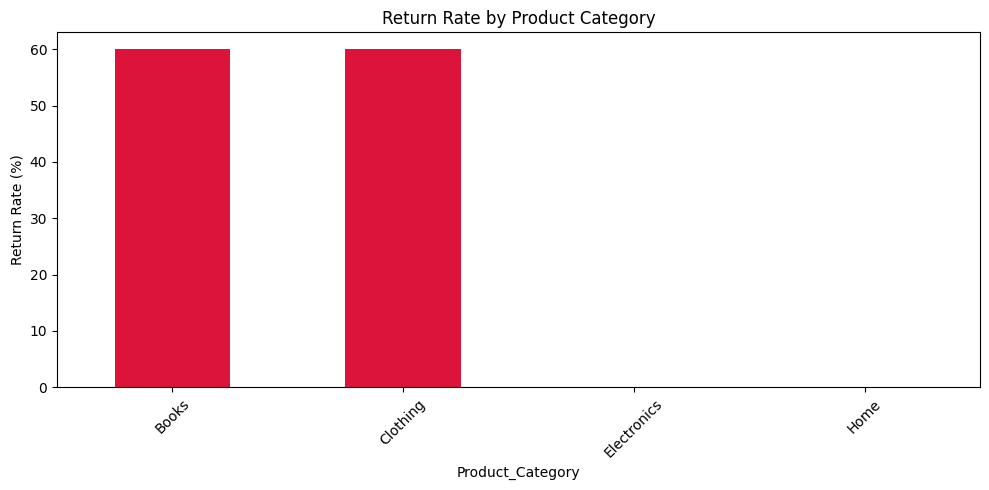

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
category_return_rate.plot(kind='bar', color='crimson')
plt.title('Return Rate by Product Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [46]:
# Count of orders per customer
customer_orders = df.groupby('Customer_ID')['Order_ID'].nunique()

# Number of repeat customers (2 or more orders)
repeat_customers = customer_orders[customer_orders > 1].count()

# Total unique customers
total_customers = customer_orders.shape[0]

# % of repeat customers
repeat_rate = (repeat_customers / total_customers) * 100

print(f" Total Customers: {total_customers}")
print(f" Repeat Customers: {repeat_customers}")
print(f" Repeat Customer Rate: {repeat_rate:.2f}%")



 Total Customers: 20
 Repeat Customers: 0
 Repeat Customer Rate: 0.00%


In [47]:
# Total revenue per customer
customer_revenue = df.groupby('Customer_ID')['Order_Amount'].sum().sort_values(ascending=False)

# Display top 5
top5_customers = customer_revenue.head(5)
print(" Top 5 Customers by Revenue:")
print(top5_customers)


 Top 5 Customers by Revenue:
Customer_ID
C113    1400
C105    1300
C117    1250
C100    1200
C108    1100
Name: Order_Amount, dtype: int64


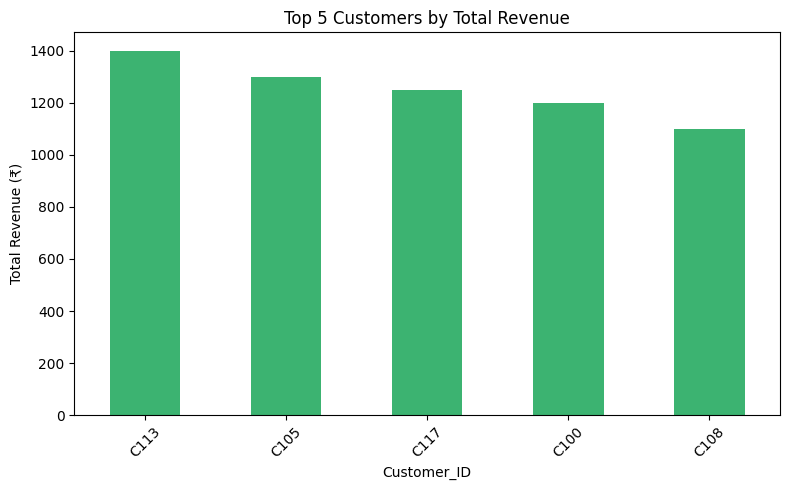

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top5_customers.plot(kind='bar', color='mediumseagreen')
plt.title('Top 5 Customers by Total Revenue')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Convert to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])


# Create a 'Month' column
df['Month'] = df['Order_Date'].dt.to_period('M')

# Group revenue by month
monthly_revenue = df.groupby('Month')['Order_Amount'].sum()

# View it
print(monthly_revenue)



Month
2023-01    4820
2023-02    3660
2023-03    4780
2023-04    1210
Freq: M, Name: Order_Amount, dtype: int64


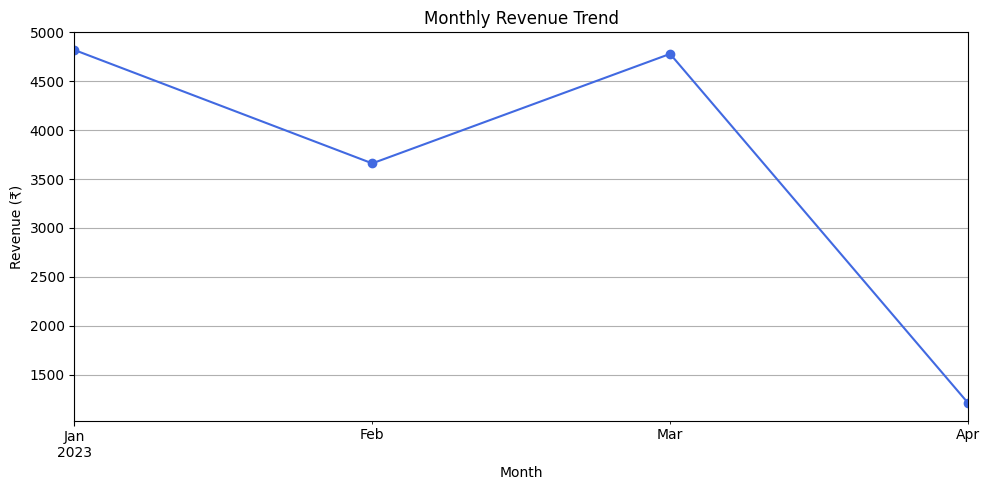

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o', color='royalblue')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (₹)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()
